In [38]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('colorblind')
sns.set_palette(palette)
sns.set(context='paper', style='white', font='CMU Serif',
    rc={'font.size':12, 'mathtext.fontset': 'cm', 'axes.labelpad':0, 'axes.linewidth': 0.5})

## WM

In [35]:
empirical = pd.read_pickle("data/behavior.pkl")
sids = empirical['sid'].unique()
dfs = []
errors = []
for sid in sids:
    df = pd.read_pickle(f"data/wm_sid{sid}.pkl")
    dfs.append(df)
    human_actions = df.query("type=='human'")['action'].to_numpy()
    model_actions = df.query("type=='model (WM)'")['action'].to_numpy()
    error = len(np.where(model_actions != human_actions)[0]) / len(human_actions)
    errors.append(error)
data_wm = pd.concat(dfs, ignore_index=True)

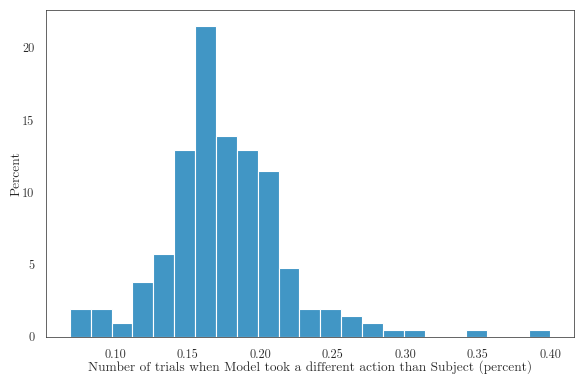

In [41]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
sns.histplot(errors, ax=ax, stat='percent', color=palette[0])
ax.set(xlabel="Number of trials when Model took a different action than Subject (percent)") 
plt.tight_layout()
fig.savefig("plots/wm_errors.png", dpi=600)